# Tutorial 4 - Python For Data Analysis 🐍 

---

## Web Scraping 🐙

### *Table of Contents*

- Regular Expression Operations 🔎
  - [Exercise 1](#exercise-1) : Regex
- Parsing the HTML with BeautifulSoup 🐼
  - [Exercice 2](#exercise-2) : Use Case n°1
  - [Exercise 3](#exercise-3) : Use case n°2

### Requirements

In [3]:
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter

## Regular Expression Operations

<a name="exercise-1">

### Exercise 1 : Regex
---

A **regular expression** is a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern.

Python has a built-in package called re, which can be used to work with Regular Expres- sions.

You can find details here: https://docs.python.org/3/library/re.html#regular-expression-syntax

#### 1) Import the re module

In [4]:
import re

#### 2) Write a regexp to extract the score, Cristiano's age, number of goals, and the number of selections from the following text:

`Buteur face au Qatar (3-0), samedi en amical, Cristiano Ronaldo (36 ans) a fait tomber un nouveau record. En effet, l'attaquant de Manchester United, meilleur buteur de l'histoire des sélections (112 buts), est devenu le footballeur européen le plus capé avec son équipe nationale. Il compte désormais 181 matchs avec la formation lusitanienne, soit un de plus que Sergio Ramos avec l'Espagne. Le Red Devil n'est plus qu'à cinq longueurs de Bader Ahmed al-Mutawa (Koweït), recordman absolu à l'échelle mondiale.`

In [5]:
texte = "Buteur face au Qatar (3-0), samedi en amical, Cristiano Ronaldo (36 ans) a fait tomber un nouveau record. En effet, l'attaquant de Manchester United, meilleur buteur de l'histoire des sélections (112 buts), est devenu le footballeur européen le plus capé avec son équipe nationale. Il compte désormais 181 matchs avec la formation lusitanienne, soit un de plus que Sergio Ramos avec l'Espagne. Le Red Devil n'est plus qu'à cinq longueurs de Bader Ahmed al-Mutawa (Koweït), recordman absolu à l'échelle mondiale."
regex = re.compile("[0-9]{1,}")
resultat = regex.findall(texte)
resultat

['3', '0', '36', '112', '181']

In [6]:
regex = re.compile("[1-9][0-9]{0,2} ans")
age = regex.findall(texte)
print(f"Ronaldo is {age[0].split(' ')[0]}.")

age = re.search("\d{1,3} ans",texte).group()
print(f"Ronaldo is {age.split(' ')[0]}.") 

Ronaldo is 36.
Ronaldo is 36.


In [7]:
regex = re.compile("[0-9]{1,2}-[0-9]{1,2}")
score = regex.findall(texte)
print(f"Score was {score[0]}.")

score = re.search("\d+-\d+",texte).group()
print(f"Score was {score.split(' ')[0]}.") 

Score was 3-0.
Score was 3-0.


In [8]:
regex = re.compile("[1-9][0-9]+ buts")
nb_of_goals = regex.findall(texte)
print(f"Number of goals: {nb_of_goals[0].split(' ')[0]}")

nb_of_goals = re.search("\d+ buts",texte).group()
print(f"Number of goals: {nb_of_goals.split(' ')[0]}") 

Number of goals: 112
Number of goals: 112


In [9]:
regex = re.compile("[1-9][0-9]+ matchs")
nb_of_selections = regex.findall(texte)
print(f"Number of Selection: {nb_of_selections[0].split(' ')[0]}")

nb_of_selections = re.search("\d+ matchs",texte).group()
print(f"Number of Selections: {nb_of_selections.split(' ')[0]}") 

Number of Selection: 181
Number of Selections: 181


#### 3) Write a regexp to get prices from the following text:

`Vous cherchez un nouvel ordinateur portable performant, fiable et en réduction? Sur Rakuten, l’ordinateur Apple MacBook Air 2020 est en promotion, avec une remise de près de 230 euros pour un tarif final qui chute sous les 900 euros grâce à la plateforme marchande.`

In [10]:
texte = "Vous cherchez un nouvel ordinateur portable performant, fiable et en réduction? Sur Rakuten, l’ordinateur Apple MacBook Air 2020 est en promotion, avec une remise de près de 230 euros pour un tarif final qui chute sous les 900 euros grâce à la plateforme marchande."
resultat = re.findall("\d+ (?:euros|€)",texte)
resultat

['230 euros', '900 euros']

#### 4) Write a regexp to get reduction values, along with promo code:

`40% sur tous les réservoirs d'essence et collecteurs d'échappement (achats internet uniquement) avec le code promo : PRINTEMPS
40% sur tous les carénages plastique (achats internet uniquement) avec le code promo : CARENAGE40
50% sur toutes les rampes d'injection (achats internet uniquement) avec le code promo : INJECTION50

In [11]:
texte = "40% sur tous les réservoirs d'essence et collecteurs d'échappement (achats internet uniquement) avec le code promo : PRINTEMPS 40% sur tous les carénages plastique (achats internet uniquement) avec le code promo : CARENAGE40 50% sur toutes les rampes d'injection (achats internet uniquement) avec le code promo : INJECTION50"
promos = re.findall("[0-9]{1,}%",texte)
codes_promos = re.findall("[A-Z]{2,}[0-9]{0,2}",texte)
list(zip(promos,codes_promos))

[('40%', 'PRINTEMPS'), ('40%', 'CARENAGE40'), ('50%', 'INJECTION50')]

## Parsing the HTML with BeautifulSoup

BeautifulSoup is a Python library for parsing HTML and XML documents. It is often used for web scraping. BeautifulSoup transforms a complex HTML document into a complex tree of Python objects, such as tag, navigable string, or comment.

Import the BeautifulSoup class from the bs4 module:

`from bs4 import BeautifulSoup

Use case 1: https://www.afm-telethon.fr/telethon/bref/parrains-resultats-telethon-1379


In [12]:
from bs4 import BeautifulSoup
import requests

<a name="exercise-2">

### Exercise 2 : Use Case n°1
---


#### 1) Query the website and return the html into the variable `page

In [13]:
page = requests.get("https://www.afm-telethon.fr/telethon/bref/parrains-resultats-telethon-1379")
if page.status_code == 200:
    print("The website has been correctly imported")
else:
    print(page.status_code)

The website has been correctly imported


#### 2) Parse the html using beautiful soup and store in variable `soup

In [14]:
soup = BeautifulSoup(page.content, 'html.parser')

#### 3) Save the Soup variable output into an HTML file and open it using web browser.

What do you remark?

In [15]:
with open("output.html", "w", encoding='utf-8') as file:
    file.write(str(soup))

Only the main page is stored (not the entire website) and all content associated to the website and stored on a server (example: images, videos that are not iframe...) are not displayed.

In [16]:
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
"http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<!--[if IE]>
<html xmlns="http://www.w3.org/1999/xhtml" class="ie" xml:lang="fr" version="XHTML+RDFa 1.0" dir="ltr"
  xmlns:og="http://ogp.me/ns#"
  xmlns:content="http://purl.org/rss/1.0/modules/content/"
  xmlns:dc="http://purl.org/dc/terms/"
  xmlns:foaf="http://xmlns.com/foaf/0.1/"
  xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
  xmlns:sioc="http://rdfs.org/sioc/ns#"
  xmlns:sioct="http://rdfs.org/sioc/types#"
  xmlns:skos="http://www.w3.org/2004/02/skos/core#"
  xmlns:xsd="http://www.w3.org/2001/XMLSchema#">
<![endif]-->
<html dir="ltr" version="XHTML+RDFa 1.0" xml:lang="fr" xmlns="http://www.w3.org/1999/xhtml" xmlns:content="http://purl.org/rss/1.0/modules/content/" xmlns:dc="http://purl.org/dc/terms/" xmlns:foaf="http://xmlns.com/foaf/0.1/" xmlns:og="http://ogp.me/ns#" xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#" xmlns:sioc="http://rdfs.org/sioc/ns#" xmlns:sioct="h

#### 4) In 2006, the counter reached its highest level. Extract this information from the webpage.

PS: do not use the table

In [17]:
info = soup.find_all('div', class_="field-item even", property="content:encoded")[0].find_all("p")[-2].text.replace(u'\xa0',' ')
info

"C'est en 2006 que le compteur a atteint son niveau le plus haut, avec 106 696 532 €."

In [18]:
resultat = re.findall("\d{1,3} \d{1,3} \d{1,3}",info)
print("Le compteur en 2006 était de", int("".join(resultat[0].split(" "))),"€")

Le compteur en 2006 était de 106696532 €


Extract the same information using the selector then using the HTML tag.

In [19]:
info = soup.find_all('p')[8].text
info

"C'est en 2006 que le compteur a atteint son niveau le plus haut, avec\xa0106 696 532 €."

In [20]:
resultat = re.findall("\d{1,3} \d{1,3} \d{1,3}",info)
print("Le compteur en 2006 était de", int("".join(resultat[0].split(" "))),"€")

Le compteur en 2006 était de 106696532 €


#### 5) Retrieve the publication date from the webpage, using the CSS classes.

In [21]:
text = soup.find_all(class_='datePublication')[0].text
regex = re.compile("[0-9]{2}/[0-9]{2}/[0-9]{4}")
resultat = regex.findall(text)
print(f"Publication date: {resultat[0]}")

Publication date: 04/07/2021


#### 6) Retrieve the number of days remaining until the next telethon from the webpage.

In [22]:
text = soup.find_all(id='block_compteur_telethon_compteur_img')
all_imgs = text[0].find_all("img")
remaining_days = int(all_imgs[-2].get("alt") + all_imgs[-1].get("alt"))
print(f"{remaining_days} days until next telethon.")

11 days until next telethon.


#### 7) Retrieve all hidden inputs from the webpage

In [23]:
text = soup.find_all("input", type="hidden")
text

[<input name="form_build_id" type="hidden" value="form--YADYfvtDKxGGvu8kh_gnTkVZpt-lCEtk8_H4eA4AnM"/>,
 <input name="form_id" type="hidden" value="apachesolr_panels_search_block"/>,
 <input name="donation_tax_rate_private" type="hidden" value="66"/>,
 <input name="donation_redirect_private" type="hidden" value="https://don.telethon.fr/?idm=30278&amp;ido=1080&amp;fdd_type=DF&amp;bandeau=A&amp;compteur=1&amp;utm_source=afm_telethon&amp;utm_medium=relais_actu&amp;utm_campaign=afm_telethon_relais_actu_fidelisation&amp;utm_content=cta_donner"/>,
 <input name="form_build_id" type="hidden" value="form-yFU7B5FufOIVGh2BdH5RUHV4FTC-KKKhBMW67axC-ro"/>,
 <input name="form_id" type="hidden" value="afm_specifics_donation_private_form"/>]

#### 8) Find the number of tables defined in the soup. Retrieve this table from the webpage.

In [24]:
table_nb = len(soup.find_all('table'))
print(f"There {'is ' + str(table_nb) + ' table' if table_nb == 1 else 'are ' + str(table_nb) + ' tables'} in the webpage.")

There is 1 table in the webpage.


In [25]:
table = soup.find('table')

#### 9) Retrieve the items from this table. Create a python dataframe representing this table (don't forget to include the name of the columns as defined in the webpage)

In [26]:
def value(x):
    while x[-1] != "€":
        x = x[:-1]
    return "".join(x[:-1].split(" "))

table = soup.find('table')

colnames = list()
for ele in table.find_all("td", class_="txt-petit"):
    colnames.append("".join(ele.text.split("\n")))
colnames

all_data = table.find_all("td")

data = np.zeros((len(colnames),len(all_data)//len(colnames))).astype(str)
for i in range(0,len(all_data),len(colnames)):
    for j in range(len(colnames)):
        data[j,i//len(colnames)]=all_data[i+j].text

df = pd.DataFrame({name:value for name, value in zip(colnames,data)}).iloc[1:,:]
df.loc[:,"Année"] = df.Année.astype(int)
df.loc[:,"Montant collecté"] = df.loc[:,"Montant collecté"].apply(value).astype(int)
df

,Année,Parrain,Montant collecté
1,1987,Jerry LEWIS,29650000
2,1988,Mireille MATHIEU,28490000
3,1989,Alain DELON,40930000
4,1990,Claudia CARDINALE,46510000
5,1991,"Jerry LEWIS, Mireille MATHIEU et",38650000
6,1992,Barbara HENDRICKS,47870000
7,1993,Michel SARDOU,55600000
8,1994,Pierre PERRET,57520000
9,1995,Serge LAMA,56763000
10,1996,Thierry LHERMITTE,56872000


#### 10) Visualize the evolution of the amount collected per year.

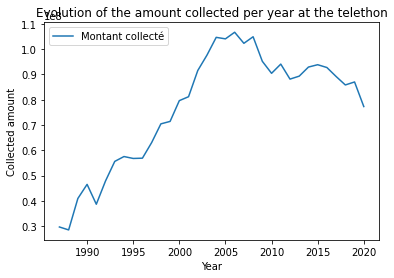

In [27]:
df.plot(x="Année",y="Montant collecté", 
             title="Evolution of the amount collected per year at the telethon",
             ylabel="Collected amount",
             xlabel="Year")
plt.show()

#### 11) Mark the maximum and minimum of the evolution with respectively red and green colors.

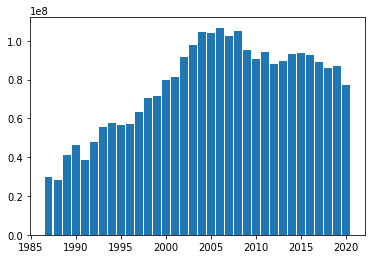

In [28]:
plt.bar(df["Année"], df["Montant collecté"])
plt.show()

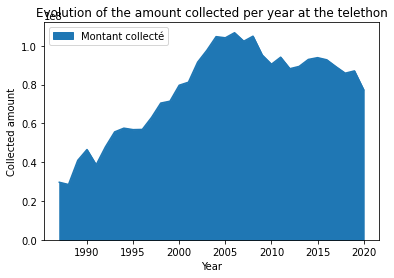

In [29]:
df.plot.area(x="Année",y="Montant collecté", 
             title="Evolution of the amount collected per year at the telethon",
             ylabel="Collected amount",
             xlabel="Year")
plt.show()

#### 12) Bonus Question : We expect the graph below:

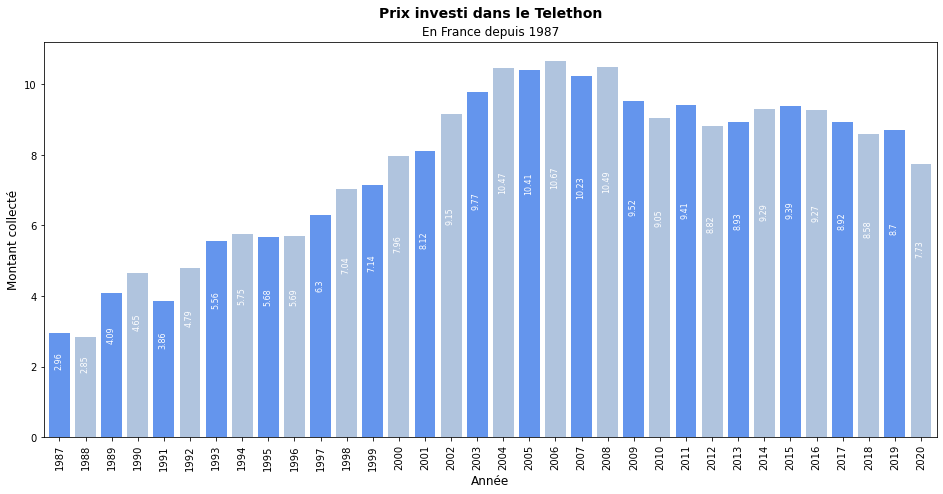

In [30]:
min_annee = min(df["Année"])
max_annee = max(df["Année"])
xlabels = np.arange(min_annee,max_annee+1)
ylabels = (df["Montant collecté"]/1e7).values

colors = ["cornflowerblue","lightsteelblue"]*(len(df["Année"])//2) 

if len(df["Année"])%2 != 0:
     colors.append("cornflowerblue")

fig, ax = plt.subplots(figsize=(16,7))
ax.bar(df["Année"], 
       df["Montant collecté"]/1e7, 
       align="center", 
       color=colors)

# Mid point of left and right x-positions
mid = (fig.subplotpars.right + fig.subplotpars.left)/2
fig.suptitle("Prix investi dans le Telethon", fontsize=14,fontweight="bold", x=mid)
ax.set_title("En France depuis 1987")

ax.set_xlim([min_annee-0.6, max_annee+0.6])
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels, rotation=90)

ax.set_xlabel("Année", fontsize=12)
ax.set_ylabel("Montant collecté", fontsize=12)

for y, m in zip(xlabels, ylabels):
    ax.text(x=y-0.2, 
            y=m*2/3, 
            s=round(m,2), 
            color="white",
            rotation="vertical",
            fontsize=8)

fig.subplots_adjust(top=0.91)
fig.show()

<a name="exercise-3">

### Exercise 3 : Use Case n°2
---

Use case 2: https://www.infoclimat.fr/observations-meteo/archives/7/septembre/2019/paris-montsouris/07156.html

#### 1) Store the html table in a dataframe

*Define a function that allows you to retrieve the value of row i and column j of the table*

In [155]:
page = requests.get("https://www.infoclimat.fr/observations-meteo/archives/7/septembre/2019/paris-montsouris/07156.html")
if page.status_code == 200:
    print("The website has been correctly imported")
else:
    print(page.status_code)

soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find("table", id="resptable-releves")

The website has been correctly imported


In [156]:
colnames = list()
colnames.append(table.find("thead").find_all("th")[0].text.replace("\n","").replace("  ",""))
for ele in table.find("thead").find_all("th")[2:]:
    colnames.append(ele.find("a").text.replace("\xa0"," "))
colnames.append("Rafales")
colnames.append("Min_temp")
colnames.append("Max_temp")
colnames

['Heure locale',
 'Température',
 'Pluie',
 'Vent',
 'Humidité',
 'Bio-météo',
 'Pt. de rosée',
 'Pression',
 'Visibilité',
 'Rafales',
 'Min_temp',
 'Max_temp']

In [157]:
doc = dict()
doc[colnames[0]] = colnames[0]
for ele, name in zip(table.find("thead").find_all("th")[2:], colnames[2:]):
   doc[name] = ele.find("a").get("title").replace("<b>","").replace("</b>","").replace("<br />"," ")
doc["Rafales"] = "Vent en rafales, observé à 10m"
doc["Min_temp"] = "Température minimale"
doc["Max_temp"] = "Température maximum"
doc

{'Bio-météo': 'Humidité relative',
 'Heure locale': 'Heure locale',
 'Humidité': 'Vent moyen et en rafales, observé à 10m',
 'Max_temp': 'Température maximum',
 'Min_temp': 'Température minimale',
 'Pluie': 'Température sous abri normalisé, relevée entre 1m50 et 2m du sol',
 'Pression': 'Point de rosée observé à 2m',
 'Pt. de rosée': "Température ressentie Elle correspond au windchill (indice de refroidissement éolien) lorsque la température est inférieure à 10°C, et à l'humidex (indice de chaleur) lorsque la température est supérieure à 20°C. Ces données n'ont pas d'unité et ne correspondent pas à une température observée.  Cette colonne affiche aussi, si disponible, les valeurs d'indice UV et de radiations solaires.",
 'Rafales': 'Vent en rafales, observé à 10m',
 'Vent': 'Précipitations tombées en 1h',
 'Visibilité': 'Pression atmosphérique ramenée au niveau de la mer'}

In [194]:
rows = table.find("tbody").find_all("tr")
all_data = np.zeros((len(colnames),len(rows)))

for i,row in enumerate(rows):
    hour = row.find_all("td")[0].find("a").get('href')
    all_data[0,i] = re.findall("\d{2}:\d{2}:\d{2}",hour)[0][:2]
    all_data[1,i] = row.find_all("td")[1].find("span").text
    all_data[2,i] = row.find_all("td")[2].text[0]
    all_data[3,i] = row.find_all("td")[3].find("span").text
    all_data[4,i] = row.find_all("td")[4].find("span").text
    all_data[5,i] = np.NaN if row.find_all("td")[5].find("a") is None else row.find_all("td")[5].find("a").find("span").text.replace("\xa0","")
    all_data[6,i] = row.find_all("td")[6].find("span").text
    all_data[7,i] = row.find_all("td")[-2].text[:-3]
    all_data[8,i] = row.find_all("td")[-1].text[:-3]
    all_data[9,i] = row.find_all("td")[3].find_all("span", style="font-weight:bold")[1].text
    all_data[10,i] = row.find_all("td")[1].find("span", style="color:#081dbb").text
    all_data[11,i] = row.find_all("td")[1].find("span", style="color:#841910").text

df = pd.DataFrame({name:value for name, value in zip(colnames,all_data)})
df.loc[:,"Température"] = df["Température"].astype(float)
df.set_index("Heure locale", inplace=True)
df

,Température,Pluie,Vent,Humidité,Bio-météo,Pt. de rosée,Pression,Visibilité,Rafales,Min_temp,Max_temp
Heure locale,,,,,,,,,,,
23.0,13.9,0.0,14.0,76.0,NaN,9.7,1023.0,20.0,32.4,13.9,14.3
22.0,14.3,0.0,18.0,73.0,NaN,9.5,1023.2,20.0,37.8,14.3,14.9
21.0,14.9,0.0,14.0,69.0,NaN,9.3,1023.0,20.0,39.6,14.7,14.9
20.0,14.8,0.0,18.0,67.0,NaN,8.7,1022.8,20.0,34.2,14.8,15.4
19.0,15.4,0.0,14.0,62.0,NaN,8.2,1022.2,20.0,45.7,15.4,16.8
18.0,16.8,0.0,22.0,59.0,81.0,8.7,1021.6,20.0,42.8,16.8,17.8
17.0,17.7,0.0,18.0,51.0,144.0,7.4,1021.1,20.0,37.8,17.6,18.2
16.0,17.8,0.0,18.0,51.0,192.0,7.5,1021.0,20.0,35.6,17.7,18.3
15.0,18.3,0.0,14.0,49.0,311.0,7.4,1020.8,20.0,34.6,18.1,18.7


#### 2) Explore the data using visualization libraries. Interpret & Conclude.

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 24 entries, 23.0 to 0.0
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Température   24 non-null     float64
 1   Pluie         24 non-null     float64
 2   Vent          24 non-null     float64
 3   Humidité      24 non-null     float64
 4   Bio-météo     12 non-null     float64
 5   Pt. de rosée  24 non-null     float64
 6   Pression      24 non-null     float64
 7   Visibilité    24 non-null     float64
 8   Rafales       24 non-null     float64
 9   Min_temp      24 non-null     float64
 10  Max_temp      24 non-null     float64
dtypes: float64(11)
memory usage: 2.2 KB


In [172]:
df.describe()

,Température,Pluie,Vent,Humidité,Bio-météo,Pt. de rosée,Pression,Visibilité,Rafales,Min_temp,Max_temp
count,24.000000,24.0,24.000000,24.000000,12.000000,24.000000,24.000000,24.0,24.000000,24.000000,24.000000
mean,16.058333,0.0,13.250000,67.791667,270.166667,9.791667,1021.354167,20.0,31.183333,15.741667,16.529167
std,1.658422,0.0,4.356405,13.622166,187.611220,1.878926,0.858704,0.0,7.490612,1.448813,1.817662
min,13.900000,0.0,7.000000,45.000000,3.000000,6.800000,1020.300000,20.0,19.400000,13.900000,14.300000
25%,14.775000,0.0,11.000000,56.500000,128.250000,8.275000,1020.775000,20.0,24.400000,14.600000,14.900000
50%,15.500000,0.0,14.000000,69.000000,234.500000,9.600000,1021.100000,20.0,33.300000,15.200000,16.100000
75%,17.725000,0.0,18.000000,80.250000,403.750000,11.725000,1021.600000,20.0,36.575000,17.050000,18.225000
max,19.200000,0.0,22.000000,86.000000,594.000000,12.300000,1023.200000,20.0,45.700000,18.200000,19.900000


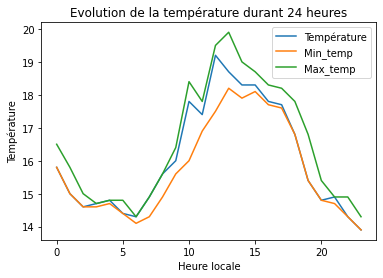

In [200]:
df.plot(y=["Température", "Min_temp", "Max_temp"],
        title="Evolution de la température durant 24 heures",
        ylabel="Température")
plt.show()

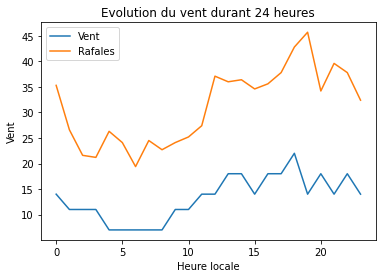

In [211]:
df.plot(y=["Vent", "Rafales"],
        title="Evolution du vent durant 24 heures",
        ylabel="Vent")
plt.show()

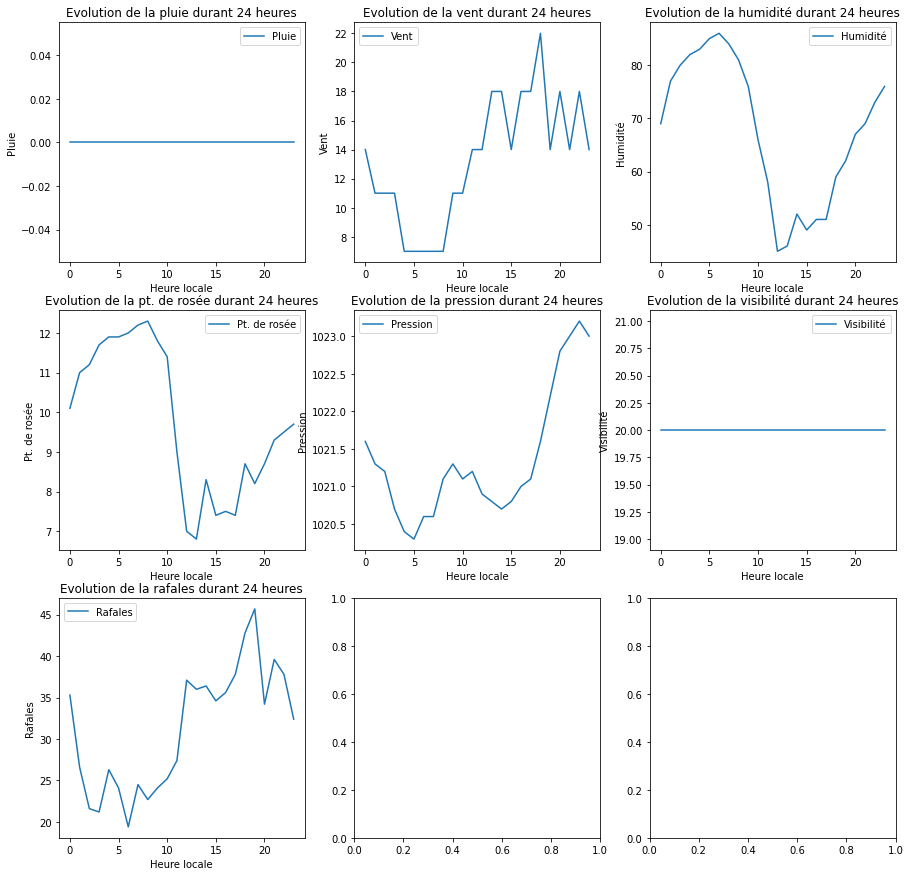

In [210]:
colnames = ["Pluie", "Vent", "Humidité", "Pt. de rosée", "Pression", "Visibilité", "Rafales"]
grid_size = round(np.sqrt(len(colnames)))

fig, axes = plt.subplots(grid_size, grid_size, figsize=(15,15))
count = 0
for r in range(grid_size):
    for c in range(grid_size):
        df.plot(y=colnames[count],
        title=f"Evolution de la {colnames[count].lower()} durant 24 heures", 
        ylabel=colnames[count],
        ax=axes[r,c])
        count += 1
        if count == len(colnames):
            break
    if count == len(colnames):
        break
plt.show()